In [ ]:
!pip install py-readability-metrics
!pip install textstat
!pip install textdescriptives
!pip install stanza
!python -m spacy download en_core_web_sm
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import textstat
from readability import Readability
import textdescriptives as td
from textdescriptives.utils import load_sms_data
from textdescriptives.integrations.sklearn_featurizer import TextDescriptivesFeaturizer
descriptive_stats_extractor = TextDescriptivesFeaturizer(lang="en", metrics=["descriptive_stats"])
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import graphviz
#from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output="pandas")
import pandas as pd
import spacy
#nlp = spacy.load("en_core_web_sm")
#nlp.add_pipe("textdescriptives/readability")
#nlp.add_pipe("textdescriptives/dependency_distance")
import stanza
nlp = stanza.Pipeline(lang='sk', processors='tokenize', tokenize_no_ssplit=True)
from nltk.corpus import reuters
#from nltk import bigrams, trigrams
#from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tag import pos_tag
from collections import Counter, defaultdict
nltk.download('reuters')
import random
import numpy as np
from numpy.linalg import norm
#from keras.utils import to_categorical
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import LSTM, Dense, GRU, Embedding
#from keras.callbacks import EarlyStopping, ModelCheckpoint
import re
import math
import csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 898.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.5 MB/s eta 0:00:00
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41930 sha256=b8d09c5179b74480c70fc369a903d7d2c559b341fcf87e1f2aefc2e070906ec3
  Stored in directory: /root/.cache/pip/wheels/92/8e/16/c1e4d4d65685d71085e4e27b44d6ed880b0559474c9ee4ff66
Successfully built ftfy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.4/970.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: sk (Slovak):
| Processor | Package |
-----------------------
| tokenize  | snk     |
| mwt       | snk     |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!
[nltk_data] Downloading package reuters to /root/nltk_data...


In [ ]:
def syllab_count(slovo):
  slovo = str(slovo)
  vowels = "aeiouyáéíóúýäôAEIOUYÁÉÍÓÚÝÄÔ"
  consonants = "bcčdďfghjklĺľmnňpqrŕsštťvwxzžBCČDĎFGHJKLĹĽMNPQRŔSŠTŤVWXZŽ"
  exceptions = "lĺrŕLĹRŔ"
  count = 0
  for c in range(0, len(slovo)):
    if slovo[c] in vowels:
      if c > 0 and slovo[c] in "aeuAEU" and slovo[c-1] in "iI":
        count = count + 0
      else:
        count = count + 1
    if slovo[c] in exceptions and c > 0 and slovo[c-1] in consonants and c < len(slovo)-1 and slovo[c+1] in consonants:
      count = count + 1
  return count

In [ ]:
df = pd.read_csv("text_MR.csv", sep = ";", decimal=",")
df['syllables'] = 0
for ind in df.index:
  df['syllables'][ind] = syllab_count(df['word'][ind])
df4 = pd.get_dummies(df.syllables)
df4["many"] = df4[6] + df4[7] + df4[8] + df4[9] + df4[10] + df4[11] + df4[12] + df4[13] + df4[14] + df4[15] + df4[16] + df4[17] + df4[18] + df4[19] + df4[20] + df4[22] + df4[25] + df4[26] + df4[31] + df4[32]
df = df.join(df4[[1,2,3,4,5,"many"]])

<ipython-input-3-c315c9dc83f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['syllables'][ind] = syllab_count(df['word'][ind])


many = 6 a viac

In [ ]:
df2 = pd.get_dummies(df.pos)
df = df.join(df2)
df3 = df.groupby(['document'])['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'syllables', 1, 2, 3, 4, 5, "many"].sum()
df2 = df.groupby(['document', 'pos'])['word'].count()
df3['document'] = df3.index
first_column = df3.pop('document')
df3.insert(0, 'document', first_column)
df3['sum_words'] = df3['ADJ'] + df3['ADP'] + df3['ADV'] + df3['AUX'] + df3['CCONJ'] + df3['DET'] + df3['INTJ'] + df3['NOUN'] + df3['NUM'] + df3['PART'] + df3['PRON'] + df3['PROPN'] + df3['SCONJ'] + df3['VERB']
df3['sum_words_2'] = df3['ADJ'] + df3['ADP'] + df3['ADV'] + df3['AUX'] + df3['CCONJ'] + df3['DET'] + df3['INTJ'] + df3['NOUN'] + df3['PART'] + df3['PRON'] + df3['PROPN'] + df3['SCONJ'] + df3['VERB']
df3['sum_sent'] = 0
for ind in df3.index:
  df3['sum_sent'][ind] = len(sent_tokenize(open(df3['document'][ind]+".txt", "r").read()))
arr = df.pos.unique()
arr2 = df.document.unique()
d = {'name': arr2}
lst = []
df2 = pd.DataFrame(data=d)
df3.insert(0, "index", [23,10,11,13,21,24,27,14,17,26,12,15,18,16,0,5,30,19,22,25,20,1,2,6,8,28,31,3,7,29,9,32,4])
df3.set_index("index", inplace = True)
df3 = df3.sort_values(by=['index'])

<ipython-input-4-22a3692687b5>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df.groupby(['document'])['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
<ipython-input-4-22a3692687b5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sum_sent'][ind] = len(sent_tokenize(open(df3['document'][ind]+".txt", "r").read()))


In [35]:
textlist = []
textlist.append(open("Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť.txt", "r").read().strip())
textlist.append(open("Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Prvouka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 2. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Čítanka pre 2. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit.txt", "r").read().strip())
textlist.append(open("Prírodoveda pre 3. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 3. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Prírodoveda pre 4. ročník ZŠ - pracovná učebnica.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 4. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Biológia pre 5. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2.txt", "r").read().strip())
textlist.append(open("Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť.txt", "r").read().strip())
textlist.append(open("Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist.append(open("Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka.txt", "r").read().strip())
textlist.append(open("Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist.append(open("Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist.append(open("Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())

In [41]:
vetylist = []
syllabelsstart = []
syllabelsend = []
syllabelsmid = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  for j in i[:10]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsstart.append(syl)
  for j in i[-10:]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsend.append(syl)
  for j in i[round(len(i)/2)-5:round(len(i)/2)+5]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsmid.append(syl)
df3["syl_start"] = syllabelsstart
df3["syl_end"] = syllabelsend
df3["syl_mid"] = syllabelsmid
vetylist = []
gun_sent = []
gun_word = []
gun_hard_word = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocviet = 0
  pocslov = 0
  poctazslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        if "." not in k and "-" not in k and "…" not in k and "'" not in k:
          try:
            sl_druh = df.loc[df['word'] == k]["pos"].loc[df.loc[df['word'] == k].index[0]]
            lema = df.loc[df['word'] == k]["lemma"].loc[df.loc[df['word'] == k].index[0]]
            if syllab_count(lema) >= 3 and sl_druh != "NOUN":
              poctazslov = poctazslov + 1
          except:
            pass
    if pocslov >= 100:
      gun_sent.append(pocviet)
      gun_word.append(pocslov)
      gun_hard_word.append(poctazslov)
      pocviet = 0
      pocslov = 0
      poctazslov = 0
      break
df3["gun_sent"] = gun_sent
df3["gun_word"] = gun_word
df3["gun_hard_word"] = gun_hard_word
charlist = []
for i in textlist:
  charlist.append(len(i))
df3["charlist"] = charlist
vetylist = []
lin_syl = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  wordlist = []
  pocslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        wordlist.append(k)
    if pocslov >= 100:
      gun_word.append(pocslov)
      pocslov = 0
      break
  wordlist = wordlist[:100]
  syl = 0
  for l in wordlist:
    if syllab_count(l) >= 3:
      syl = syl + 3
    else:
      syl = syl + 1
  lin_syl.append(syl)
df3["lin_syl"] = lin_syl

In [42]:
kw = pd.read_csv("prim-5.0-public-all.txt", sep = " ", quoting=csv.QUOTE_NONE)
kw = kw.loc[:9999]
keywords = kw["Form"].tolist()
keywords = list(dict.fromkeys(keywords))

In [43]:
textfile = open("all.txt", "r")
data = textfile.read()
keywords = data.split("\n")
textfile.close()

In [44]:
vetylist = []
hard_words = []
unique_words = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocunikslov = 0
  poctazslov = 0
  for j in i:
    nltk_tokens = nltk.word_tokenize(j)
    pocunikslov = pocunikslov + len(Counter(nltk_tokens).keys())
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        if k not in keywords:
          poctazslov = poctazslov + 1
  hard_words.append(poctazslov)
  unique_words.append(pocunikslov)
df3["hard_words"] = hard_words
df3["unique_words"] = unique_words
df3.to_csv('tab1.csv', sep=';', encoding='utf-16', index=False)
df.to_csv('text_MR_2.csv', sep=';', encoding='utf-16', index=False)

**TextDescriptives:**

In [48]:
metricslist = []
for i in textlist:
  metricslist.append(td.extract_metrics(text=i, lang="en", metrics=['readability']))
dfTD = pd.concat(metricslist)
dfTD.insert(0, "name", ["metrics1SJ","metrics1SJL","metrics1PR","metrics2SJ","metrics2SJL","metrics2MAT","metrics3PR","metrics3SJ","metrics4PR","metrics4SJ","metrics5PR","metrics6PR","metrics6FYZ","metrics7PR","metrics8DEJ","metrics8FYZ","metrics8GEO","metrics9DEJ","metrics9FYZ","metrics9MAT","metrics9OBN","metrics10CHE","metrics10OBN","metrics11PR","metrics11CHE","metrics11OBN","metrics12FYZ","metrics12CHE","metrics12SJL","metrics12SJ","metrics13MAT","metrics13SJL","metrics13SJ"])
dfTD.insert(1, "document", ["Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť","Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ","Prvouka pre 1. ročník ZŠ","Slovenský jazyk pre 2. ročník ZŠ","Čítanka pre 2. ročník ZŠ","Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit","Prírodoveda pre 3. ročník ZŠ","Slovenský jazyk pre 3. ročník ZŠ","Prírodoveda pre 4. ročník ZŠ - pracovná učebnica","Slovenský jazyk pre 4. ročník ZŠ","Biológia pre 5. ročník ZŠ","Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom","Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom","Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom","Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2","Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť","Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP)","Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka","Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP)","Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM","Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM"])
dfTD.insert(2, "year", [1,1,1,2,2,2,3,3,4,4,5,6,6,7,8,8,8,9,9,9,9,10,10,11,11,11,12,12,12,12,13,13,13])
dfTD.insert(2, "grade", [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3])
dfTD.insert(3, "subject", ["SJ","SJL","PR","SJ","SJL","MAT","PR","SJ","PR","SJ","PR","PR","FYZ","PR","DEJ","FYZ","GEO","DEJ","FYZ","MAT","OBN","CHE","OBN","PR","CHE","OBN","FYZ","CHE","SJL","SJ","MAT","SJL","SJ"])
dfTD.reset_index(inplace = True)
dfTD = dfTD.drop(["index","text"], axis=1)

Pre sk a cs nie sú dostupné metriky. Pracujem s en.

**Readability:**

In [49]:
Readabilitylist = []
for i in textlist:
  Readabilitylist.append(Readability(i))
fklist = []
fklist_score = []
fklist_grade_level = []
flist = []
flist_score = []
flist_ease = []
flist_grade_level = []
dclist = []
dclist_score = []
dclist_grade_level = []
arilist = []
arilist_score = []
arilist_grade_level = []
arilist_ages = []
cllist = []
cllist_score = []
cllist_grade_level = []
gflist = []
gflist_score = []
gflist_grade_level = []
smoglist = []
smoglist_score = []
smoglist_grade_level = []
smogalist = []
smogalist_score = []
smogalist_grade_level = []
slist = []
slist_score = []
slist_grade_level = []
lwlist = []
lwlist_score = []
lwlist_grade_level = []
for i in Readabilitylist:
  fklist.append(i.flesch_kincaid())
  flist.append(i.flesch())
  dclist.append(i.dale_chall())
  arilist.append(i.ari())
  cllist.append(i.coleman_liau())
  gflist.append(i.gunning_fog())
  smoglist.append(i.smog())
  smogalist.append(i.smog(all_sentences=True))
  slist.append(i.spache())
  lwlist.append(i.linsear_write())
for i in fklist:
  fklist_score.append(i.score)
  fklist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_flesch_kincaid_score", fklist_score, True)
dfTD.insert(len(dfTD.columns),"R_flesch_kincaid_grade_level", fklist_grade_level, True)
for i in flist:
  flist_score.append(i.score)
  flist_ease.append(i.ease)
  flist_grade_level.append(i.grade_levels)
dfTD.insert(len(dfTD.columns),"R_flesch_score", flist_score, True)
dfTD.insert(len(dfTD.columns),"R_flesch_ease", flist_ease, True)
dfTD.insert(len(dfTD.columns),"R_flesch_grade_levels", flist_grade_level, True)
for i in dclist:
  dclist_score.append(i.score)
  dclist_grade_level.append(i.grade_levels)
dfTD.insert(len(dfTD.columns),"R_dale_chall_score", dclist_score, True)
dfTD.insert(len(dfTD.columns),"R_dale_chall_grade_levels", dclist_grade_level, True)
for i in arilist:
  arilist_score.append(i.score)
  arilist_ages.append(i.ages)
  arilist_grade_level.append(i.grade_levels)
dfTD.insert(len(dfTD.columns),"R_ari_score", arilist_score, True)
dfTD.insert(len(dfTD.columns),"R_ari_grade_levels", arilist_grade_level, True)
dfTD.insert(len(dfTD.columns),"R_ari_ages", arilist_ages, True)
for i in cllist:
  cllist_score.append(i.score)
  cllist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_coleman_liau_score", cllist_score, True)
dfTD.insert(len(dfTD.columns),"R_coleman_liau_grade_level", cllist_grade_level, True)
for i in gflist:
  gflist_score.append(i.score)
  gflist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_gunning_fog_score", gflist_score, True)
dfTD.insert(len(dfTD.columns),"R_gunning_fog_grade_level", gflist_grade_level, True)
for i in smoglist:
  smoglist_score.append(i.score)
  smoglist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_smog_score", smoglist_score, True)
dfTD.insert(len(dfTD.columns),"R_smog_grade_level", smoglist_grade_level, True)
for i in smogalist:
  smogalist_score.append(i.score)
  smogalist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_smog_all_sentences_score", smogalist_score, True)
dfTD.insert(len(dfTD.columns),"R_smog_all_sentences_grade_level", smogalist_grade_level, True)
for i in slist:
  slist_score.append(i.score)
  slist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_spache_score", slist_score, True)
dfTD.insert(len(dfTD.columns),"R_spache_grade_level", slist_grade_level, True)
for i in lwlist:
  lwlist_score.append(i.score)
  lwlist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_linsear_write_score", lwlist_score, True)
dfTD.insert(len(dfTD.columns),"R_linsear_write_grade_level", lwlist_grade_level, True)

**Texstat:**

In [50]:
tfllist = []
tfkglist = []
tgflist = []
tsmoglist = []
tarilist = []
tcllist = []
tdclist = []
tstdlist = []
tlwlist = []
tslist = []
teflawlist = []
trtlist = []
tsyllist = []
tlexlist = []
tsentlist = []
tcharlist = []
tletlist = []
tpolylist = []
tmonolist = []
tdifflist = []
for i in textlist:
  tfllist.append(textstat.flesch_reading_ease(i))
  tfkglist.append(textstat.flesch_kincaid_grade(i))
  tgflist.append(textstat.gunning_fog(i))
  tsmoglist.append(textstat.smog_index(i))
  tarilist.append(textstat.automated_readability_index(i))
  tcllist.append(textstat.coleman_liau_index(i))
  tlwlist.append(textstat.linsear_write_formula(i))
  tdclist.append(textstat.dale_chall_readability_score(i))
  tstdlist.append(textstat.text_standard(i, float_output=False))
  tslist.append(textstat.spache_readability(i))
  teflawlist.append(textstat.mcalpine_eflaw(i))
  trtlist.append(textstat.reading_time(i, ms_per_char=14.69))
  tsyllist.append(textstat.syllable_count(i))
  tlexlist.append(textstat.lexicon_count(i, removepunct=True))
  tsentlist.append(textstat.sentence_count(i))
  tcharlist.append(textstat.char_count(i, ignore_spaces=True))
  tletlist.append(textstat.letter_count(i, ignore_spaces=True))
  tpolylist.append(textstat.polysyllabcount(i))
  tmonolist.append(textstat.monosyllabcount(i))
  tdifflist.append(textstat.difficult_words(i))
dfTD.insert(len(dfTD.columns),"T_flesch_reading_ease", tfllist, True)
dfTD.insert(len(dfTD.columns),"T_flesch_kincaid_grade", tfkglist, True)
dfTD.insert(len(dfTD.columns),"T_gunning_fog", tgflist, True)
dfTD.insert(len(dfTD.columns),"T_smog_index", tsmoglist, True)
dfTD.insert(len(dfTD.columns),"T_automated_readability_index", tarilist, True)
dfTD.insert(len(dfTD.columns),"T_coleman_liau_index", tcllist, True)
dfTD.insert(len(dfTD.columns),"T_linsear_write_formula", tlwlist, True)
dfTD.insert(len(dfTD.columns),"T_dale_chall_readability_score", tdclist, True)
dfTD.insert(len(dfTD.columns),"T_text_standard", tstdlist, True)
dfTD.insert(len(dfTD.columns),"T_spache_readability", tslist, True)
dfTD.insert(len(dfTD.columns),"T_mcalpine_eflaw", teflawlist, True)
dfTD.insert(len(dfTD.columns),"T_reading_time", trtlist, True)
dfTD.insert(len(dfTD.columns),"T_syllable_count", tsyllist, True)
dfTD.insert(len(dfTD.columns),"T_lexicon_count", tlexlist, True)
dfTD.insert(len(dfTD.columns),"T_sentence_count", tsentlist, True)
dfTD.insert(len(dfTD.columns),"T_char_count", tcharlist, True)
dfTD.insert(len(dfTD.columns),"T_letter_count", tletlist, True)
dfTD.insert(len(dfTD.columns),"T_polysyllabcount", tpolylist, True)
dfTD.insert(len(dfTD.columns),"T_monosyllabcount", tmonolist, True)
dfTD.insert(len(dfTD.columns),"T_difficult_words", tdifflist, True)
dfTD.to_csv('tab2.csv', sep=';', encoding='utf-16', index=False)

R_Dale_chall je absolútne nepoužiteľné v neupravenej forme.

In [51]:
dfcomp = dfTD[['name', "document", 'year', 'grade', 'subject', 'token_length_mean', 'token_length_median', 'token_length_std', 'sentence_length_mean', 'sentence_length_median', 'sentence_length_std', 'syllables_per_token_mean', 'syllables_per_token_median', 'syllables_per_token_std', 'n_tokens', 'T_lexicon_count', 'n_unique_tokens', 'proportion_unique_tokens', 'n_characters', 'T_char_count', 'T_letter_count', 'n_sentences', 'T_sentence_count', 'T_reading_time', 'T_syllable_count', 'T_polysyllabcount', 'T_monosyllabcount', 'T_difficult_words']]
dfcomp.insert(15, "sum_words", df3["sum_words"])
dfcomp.insert(16, "sum_words_2", df3["sum_words_2"])
dfcomp.insert(22, "charlist", df3["charlist"])
dfcomp.insert(23, "sum_sent", df3["sum_sent"])
dfcomp.insert(27, "syllables", df3["syllables"])
dfcomp.insert(29, "multi syllables", df3[2] + df3[3] + df3[4] + df3[5] + df3["many"])
dfcomp.insert(30, "two syllables", df3[2])
dfcomp.insert(31, "three syllables", df3[3])
dfcomp.insert(32, "four syllables", df3[4])
dfcomp.insert(33, "five syllables", df3[5])
dfcomp.insert(34, "many syllables", df3["many"])
dfcomp.insert(36, "single syllables", df3[1])
dfcomp.insert(38, "smog_syllables", df3["syl_start"]+df3["syl_end"]+df3["syl_mid"])
dfcomp.insert(40, "gun_sent", df3["gun_sent"])
dfcomp.insert(41, "gun_word", df3["gun_word"])
dfcomp.insert(42, "gun_hard_word", df3["gun_hard_word"])
dfcomp.insert(43, "lin_syl", df3["lin_syl"])
dfcomp.insert(44, "hard_words", df3["hard_words"])
dfcomp.insert(45, "unique_words", df3["unique_words"])
dfcomp.insert(46, "NUM", df3["NUM"])
dfcomp.insert(47, "PROPN", df3["PROPN"])
dfcomp.insert(48, "SCONJ", df3["SCONJ"])

smog nie je veľmi použiteľný, keďže je ťažké určiť, odkiaľ pokiaľ presne sa vyskytujú použiteľné vety (keď tak len uprostred)

In [52]:
dfmetr = dfTD[['name', "document", 'year', 'grade', 'subject', 'flesch_kincaid_grade', 'R_flesch_kincaid_grade_level', 'T_flesch_kincaid_grade', 'smog', 'R_smog_score', 'R_smog_all_sentences_score', 'T_smog_index', 'gunning_fog', 'R_gunning_fog_score', 'T_gunning_fog', 'automated_readability_index', 'R_ari_score', 'T_automated_readability_index', 'coleman_liau_index', 'R_coleman_liau_score', 'T_coleman_liau_index', 'R_spache_score', 'T_spache_readability', 'R_linsear_write_score', 'T_linsear_write_formula', 'R_dale_chall_score', 'T_dale_chall_readability_score']]
dfmetr.insert(8, "M_flesch_kincaid", 0)
dfmetr.insert(13, "M_smog", 0)
dfmetr.insert(17, "M_gunning_fog", 0)
dfmetr.insert(21, "M_ari", 0)
dfmetr.insert(25, "M_coleman_liau", 0)
dfmetr.insert(28, "M_spache", 0)
dfmetr.insert(31, "M_linsear_write", 0)
dfmetr.insert(34, "M_dale_chall", 0)
dfmetr.insert(35, "M_Mistrík", 0)
for ind in dfmetr.index:
  dfmetr['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words"][ind])-15.59
  dfmetr['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
  dfmetr['M_gunning_fog'][ind] = 0.4*(dfcomp['gun_word'][ind]/dfcomp['gun_sent'][ind] + 100*(dfcomp['gun_hard_word'][ind]/dfcomp['gun_word'][ind]))
  dfmetr['M_ari'][ind] = 0.5*(dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind]) + 4.71*(dfcomp['charlist'][ind]/dfcomp['sum_words'][ind])-21.43
  dfmetr['M_coleman_liau'][ind] = 5.88*(dfcomp['charlist'][ind]/dfcomp['sum_words'][ind])-29.6*(dfcomp['sum_sent'][ind]/dfcomp['sum_words'][ind])-15.8
  dfmetr['M_spache'][ind] = (0.121*dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind])+(8.2*dfcomp['hard_words'][ind]/dfcomp['sum_words'][ind])+0.659
  if (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind]) > 20:
    dfmetr['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2
  else:
    dfmetr['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2-1
  dfmetr['M_dale_chall'][ind] = 0.1579*(dfcomp['hard_words'][ind]/dfcomp['sum_words'][ind]*100) + 0.0496*(dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind])
  dfmetr['M_Mistrík'][ind] = 50-(((dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind])*(dfcomp["syllables"][ind]/dfcomp["sum_words"][ind]))/(dfcomp["sum_words"][ind]/dfcomp["unique_words"][ind]))
  #*(1+(dfcomp["sum_words"][ind]/(dfcomp["NUM"][ind]+dfcomp["PROPN"][ind])))*(1+(dfcomp["SCONJ"][ind]/dfcomp["sum_words"][ind])))

<ipython-input-52-588f53c90116>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmetr['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words"][ind])-15.59
<ipython-input-52-588f53c90116>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmetr['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
<ipython-input-52-588f53c90116>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [53]:
dfmetrx = dfTD[['name', "document", 'year', 'grade', 'subject']]
dfmetrx.insert(5, "M_flesch_kincaid", 0)
dfmetrx.insert(6, "M_smog", 0)
dfmetrx.insert(7, "M_gunning_fog", 0)
dfmetrx.insert(8, "M_ari", 0)
dfmetrx.insert(9, "M_coleman_liau", 0)
dfmetrx.insert(10, "M_spache", 0)
dfmetrx.insert(11, "M_linsear_write", 0)
dfmetrx.insert(12, "M_dale_chall", 0)
dfmetrx.insert(13, "M_Mistrík", 0)
for ind in dfmetrx.index:
  dfmetrx['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind])-15.59
  dfmetrx['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
  dfmetrx['M_gunning_fog'][ind] = 0.4*(dfcomp['gun_word'][ind]/dfcomp['gun_sent'][ind] + 100*(dfcomp['gun_hard_word'][ind]/dfcomp['gun_word'][ind]))
  dfmetrx['M_ari'][ind] = 0.5*(dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind]) + 4.71*(dfcomp['charlist'][ind]/dfcomp['sum_words_2'][ind])-21.43
  dfmetrx['M_coleman_liau'][ind] = 5.88*(dfcomp['charlist'][ind]/dfcomp['sum_words_2'][ind])-29.6*(dfcomp['sum_sent'][ind]/dfcomp['sum_words_2'][ind])-15.8
  dfmetrx['M_spache'][ind] = (0.121*dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])+(8.2*dfcomp['hard_words'][ind]/dfcomp['sum_words_2'][ind])+0.659
  if (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind]) > 20:
    dfmetrx['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2
  else:
    dfmetrx['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2-1
  dfmetrx['M_dale_chall'][ind] = 0.1579*(dfcomp['hard_words'][ind]/dfcomp['sum_words_2'][ind]*100) + 0.0496*(dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])
  dfmetrx['M_Mistrík'][ind] = 50-(((dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind]))/(dfcomp["sum_words_2"][ind]/dfcomp["unique_words"][ind]))

<ipython-input-53-943bcc4ebc6d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmetrx['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind])-15.59
<ipython-input-53-943bcc4ebc6d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmetrx['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
<ipython-input-53-943bcc4ebc6d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [54]:
dfmetry = dfTD[['name', "document", 'year', 'grade', 'subject']]
dfmetry.insert(5, "M_flesch_kincaid", 0)
dfmetry.insert(6, "M_smog", 0)
dfmetry.insert(7, "M_gunning_fog", 0)
dfmetry.insert(8, "M_ari", 0)
dfmetry.insert(9, "M_coleman_liau", 0)
dfmetry.insert(10, "M_spache", 0)
dfmetry.insert(11, "M_linsear_write", 0)
dfmetry.insert(12, "M_dale_chall", 0)
dfmetry.insert(13, "M_Mistrík", 0)
for ind in dfmetry.index:
  dfmetry['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind])-26
  dfmetry['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
  dfmetry['M_gunning_fog'][ind] = 0.4*(dfcomp['gun_word'][ind]/dfcomp['gun_sent'][ind] + 100*(dfcomp['gun_hard_word'][ind]/dfcomp['gun_word'][ind]))
  dfmetry['M_ari'][ind] = 0.5*(dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind]) + 4.71*(dfcomp['charlist'][ind]/dfcomp['sum_words_2'][ind])-21.43
  dfmetry['M_coleman_liau'][ind] = 5.88*(dfcomp['charlist'][ind]/dfcomp['sum_words_2'][ind])-29.6*(dfcomp['sum_sent'][ind]/dfcomp['sum_words_2'][ind])-15.8
  dfmetry['M_spache'][ind] = (0.121*dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])+(8.2*dfcomp['hard_words'][ind]/dfcomp['sum_words_2'][ind])+0.659
  if (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind]) > 20:
    dfmetry['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2
  else:
    dfmetry['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2-1
  dfmetry['M_dale_chall'][ind] = 0.1579*(dfcomp['hard_words'][ind]/dfcomp['sum_words_2'][ind]*100) + 0.0496*(dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])
  dfmetry['M_Mistrík'][ind] = 50-(((dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind]))/(dfcomp["sum_words_2"][ind]/dfcomp["unique_words"][ind]))
dfmetry

<ipython-input-54-7c5998aa4ec6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmetry['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind])-26
<ipython-input-54-7c5998aa4ec6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmetry['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
<ipython-input-54-7c5998aa4ec6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,name,document,year,grade,subject,M_flesch_kincaid,M_smog,M_gunning_fog,M_ari,M_coleman_liau,M_spache,M_linsear_write,M_dale_chall,M_Mistrík
0,metrics1SJ,"Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť",1,1,SJ,2.952148,6.605551,14.589080,16.688433,23.013871,7.680967,4.315789,11.975371,27.974994
1,metrics1SJL,Pracovný zošit k Hupsovmu šlabikáru Lipka pre ...,1,1,SJL,0.822263,5.449490,18.767884,15.577850,21.603327,7.048577,3.863636,10.736924,30.086711
2,metrics1PR,Prvouka pre 1. ročník ZŠ,1,1,PR,3.365504,8.656854,18.554268,20.242516,27.594044,7.678156,6.000000,12.136886,29.336262
3,metrics2SJ,Slovenský jazyk pre 2. ročník ZŠ,2,1,SJ,0.802779,6.741657,15.710576,13.637238,19.366692,6.861580,4.263158,10.604850,31.464867
4,metrics2SJL,Čítanka pre 2. ročník ZŠ,2,1,SJL,1.515077,6.000000,17.068031,13.496748,18.530649,7.001846,3.478261,10.341382,25.205554
5,metrics2MAT,"Matematika pre 2. ročník ZŠ, 1. časť - pracovn...",2,1,MAT,0.959107,7.582576,14.548962,38.297223,49.823936,7.054627,13.714286,11.362515,25.449891
6,metrics3PR,Prírodoveda pre 3. ročník ZŠ,3,1,PR,2.898493,5.828427,21.545347,16.699789,22.517364,7.088215,21.200000,10.501252,24.634963
7,metrics3SJ,Slovenský jazyk pre 3. ročník ZŠ,3,1,SJ,1.084878,7.358899,15.748109,14.084217,19.939131,6.953818,5.500000,10.848854,31.970837
8,metrics4PR,Prírodoveda pre 4. ročník ZŠ - pracovná učebnica,4,1,PR,3.978930,5.449490,21.055534,16.663245,22.034101,7.139246,21.200000,10.383344,21.501917
9,metrics4SJ,Slovenský jazyk pre 4. ročník ZŠ,4,1,SJ,1.353543,6.872983,16.364912,13.918037,19.676276,6.958173,4.473684,10.714728,30.492381


In [55]:
dfcomp2 = dfcomp[['name', "document", 'year', 'grade', 'subject']]
dfcomp2.insert(5, "words_per_sent", 0)
dfcomp2.insert(6, "syllabs_per_word", 0)
dfcomp2.insert(7, "letters_per_word", 0)
dfcomp2.insert(8, "longwords_per_word", 0)
dfcomp2.insert(9, "hardwords_per_word", 0)
dfcomp2.insert(10, "uniquewords_per_word", 0)
for ind in dfmetr.index:
  dfcomp2['words_per_sent'][ind] = dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind]
  dfcomp2['syllabs_per_word'][ind] = dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind]
  dfcomp2['letters_per_word'][ind] = dfcomp["charlist"][ind]/dfcomp["sum_words_2"][ind]
  dfcomp2['longwords_per_word'][ind] = df3["many"][ind]/dfcomp["sum_words_2"][ind]
  dfcomp2['hardwords_per_word'][ind] = dfcomp['hard_words'][ind]/dfcomp["sum_words_2"][ind]
  dfcomp2['uniquewords_per_word'][ind] = dfcomp["sum_words_2"][ind]/dfcomp["unique_words"][ind]

<ipython-input-55-342e2f8119d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcomp2['words_per_sent'][ind] = dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind]
<ipython-input-55-342e2f8119d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcomp2['syllabs_per_word'][ind] = dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind]
<ipython-input-55-342e2f8119d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcomp2['letters_per_wo

In [ ]:
dfmetr.to_csv('tab3.csv', sep=';', encoding='utf-16', index=False)
dfcomp.to_csv('tab4.csv', sep=';', encoding='utf-16', index=False)
dfmetr2 = dfmetr[['name', "document", 'year', 'grade', 'subject', 'M_flesch_kincaid', 'M_smog', 'M_gunning_fog', 'M_ari', 'M_coleman_liau', 'M_spache', 'M_linsear_write', 'M_dale_chall', 'M_Mistrík']]
dfmetr2.to_csv('tab5.csv', sep=';', encoding='utf-16', index=False)
dfcomp2.to_csv('tab6.csv', sep=';', encoding='utf-16', index=False)

In [56]:
Y = np.array([1,1,1,2,2,2,3,3,4,4,5,6,6,7,8,8,8,9,9,9,9,10,10,11,11,11,12,12,12,12,13,13,13])
FK = dfmetr2['M_flesch_kincaid'].to_numpy()
S = dfmetr2['M_smog'].to_numpy()
GF = dfmetr2['M_gunning_fog'].to_numpy()
A = dfmetr2['M_ari'].to_numpy()
CL = dfmetr2['M_coleman_liau'].to_numpy()
S = dfmetr2['M_spache'].to_numpy()
LW = dfmetr2['M_linsear_write'].to_numpy()
DC = dfmetr2['M_dale_chall'].to_numpy()

In [57]:
cosine = []
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(FK)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(S)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(GF)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(A)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(CL)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(S)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(LW)))
cosine.append(np.dot(Y,FK)/(norm(Y)*norm(DC)))

In [58]:
cosine

[0.9249903289902026,
 1.7910686102260458,
 0.24684973990611614,
 0.7825196874119449,
 0.5958442506643767,
 1.7910686102260458,
 0.40289970556021915,
 1.2328743125872041]

In [59]:
def cat2int(column):
    vals = list(set(column))
    for i, string in enumerate(column):
        column[i] = vals.index(string)
    return column

In [ ]:
cat2int(dfcomp2['subject'])

<ipython-input-23-15925e466f11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = vals.index(string)


0     1
1     6
2     3
3     1
4     6
5     0
6     3
7     1
8     3
9     1
10    3
11    3
12    5
13    3
14    4
15    5
16    8
17    4
18    5
19    0
20    7
21    2
22    7
23    3
24    2
25    7
26    5
27    2
28    6
29    1
30    0
31    6
32    1
Name: subject, dtype: object

Accuracy: 1.0


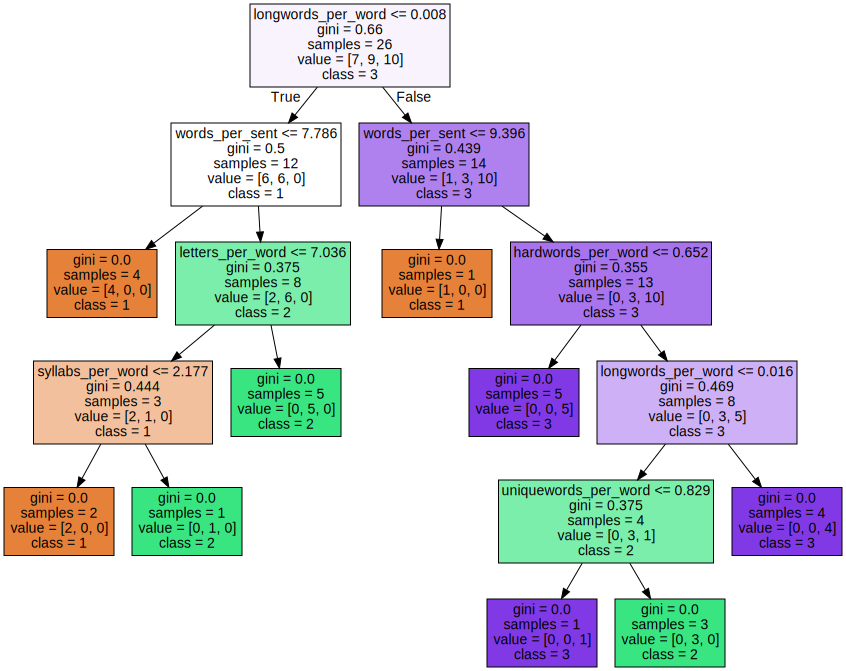

In [60]:
dftrain = ['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']
X = dfcomp2[dftrain]
y = dfcomp2['grade']
y=y.astype('int')
i = 0
while i < 1:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = DecisionTreeClassifier(max_depth=6)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  i = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = dftrain,class_names=['1','2','3'], filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('decision tree')
graph

In [ ]:
dfcomp2[dfcomp2['pocet_golov']>3]

KeyError: 'pocet_golov'

In [61]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000), SGDClassifier(), LinearSVC(), KNeighborsClassifier(n_neighbors=2), GradientBoostingClassifier(), BernoulliNB()]
for classifier in classifiers:
  clf = classifier
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  p, r, f, s = precision_recall_fscore_support(y_test, y_pred)
  print(classifier)
  print('acc: ',metrics.accuracy_score(y_test, y_pred))
  print('prec: ',((p[0]+p[1])/2),'(',p[0],' / ',p[1],')')
  print('rec: ',((r[0]+r[1])/2),'(',r[0],' / ',r[1],')')
  print('f1-sc:',((f[0]+f[1])/2))
  print('-----------------------------')

DecisionTreeClassifier()
acc:  0.8571428571428571
prec:  1.0 ( 1.0  /  1.0 )
rec:  0.8333333333333333 ( 0.6666666666666666  /  1.0 )
f1-sc: 0.9
-----------------------------
RandomForestClassifier()
acc:  0.8571428571428571
prec:  1.0 ( 1.0  /  1.0 )
rec:  0.75 ( 1.0  /  0.5 )
f1-sc: 0.8333333333333333
-----------------------------
LogisticRegression(class_weight='balanced', max_iter=10000)
acc:  0.42857142857142855
prec:  0.3333333333333333 ( 0.6666666666666666  /  0.0 )
rec:  0.3333333333333333 ( 0.6666666666666666  /  0.0 )
f1-sc: 0.3333333333333333
-----------------------------
SGDClassifier()
acc:  0.42857142857142855
prec:  0.16666666666666666 ( 0.0  /  0.3333333333333333 )
rec:  0.25 ( 0.0  /  0.5 )
f1-sc: 0.2
-----------------------------
LinearSVC()
acc:  0.5714285714285714
prec:  0.3333333333333333 ( 0.6666666666666666  /  0.0 )
rec:  0.3333333333333333 ( 0.6666666666666666  /  0.0 )
f1-sc: 0.3333333333333333
-----------------------------
KNeighborsClassifier(n_neighbors=2)
a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier()
acc:  0.8571428571428571
prec:  1.0 ( 1.0  /  1.0 )
rec:  0.75 ( 1.0  /  0.5 )
f1-sc: 0.8333333333333333
-----------------------------
BernoulliNB()
acc:  0.2857142857142857
prec:  0.0 ( 0.0  /  0.0 )
rec:  0.0 ( 0.0  /  0.0 )
f1-sc: 0.0
-----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
dfcomp3 = dfcomp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].mean()
dfcomp4 = dfcomp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].min()
dfcomp5 = dfcomp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].max()
for column in dfcomp3:
  dfcomp3 = dfcomp3.rename(columns={column: column+"_aver"})
i = 0
for column in dfcomp4:
  dfcomp3.insert(i, column+"_min", dfcomp4[column])
  i = i + 2
i = 2
for column in dfcomp5:
  dfcomp3.insert(i, column+"_max", dfcomp5[column])
  i = i + 3
dfcomp3 = dfcomp3.reset_index()
dfcomp6 = dfcomp2.groupby(['grade'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].mean()
dfcomp7 = dfcomp2.groupby(['grade'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].min()
dfcomp8 = dfcomp2.groupby(['grade'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].max()
for column in dfcomp6:
  dfcomp6 = dfcomp6.rename(columns={column: column+"_aver"})
i = 0
for column in dfcomp7:
  dfcomp6.insert(i, column+"_min", dfcomp7[column])
  i = i + 2
i = 2
for column in dfcomp8:
  dfcomp6.insert(i, column+"_max", dfcomp8[column])
  i = i + 3
dfcomp6 = dfcomp6.reset_index()
dfcomp3.to_csv('tab7.csv', sep=';', encoding='utf-16', index=False)
dfcomp6.to_csv('tab8.csv', sep=';', encoding='utf-16', index=False)

<ipython-input-62-2e4de330523a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfcomp3 = dfcomp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].mean()
<ipython-input-62-2e4de330523a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfcomp4 = dfcomp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].min()
<ipython-input-62-2e4de330523a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfcomp5 = dfcomp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniqu

V prvom kole boli identifikované extrémne hodnoty, po úprave textov zmizli. Ďalej sa veľmi neobjavujú.

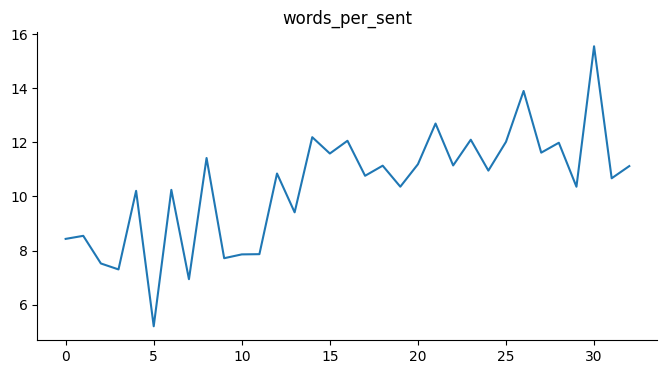

In [63]:
# @title words_per_sent

from matplotlib import pyplot as plt
dfcomp2['words_per_sent'].plot(kind='line', figsize=(8, 4), title='words_per_sent')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
dfx = pd.read_csv("text_MR_3.csv", sep = ";", decimal=",")
dfx['syllables'] = 0
for ind in dfx.index:
  dfx['syllables'][ind] = syllab_count(dfx['word'][ind])
df5 = pd.get_dummies(dfx.syllables)
df5["many"] = df5[6] + df5[7] + df5[8] + df5[9] + df5[10] + df5[11] + df5[12] + df5[13] + df5[14] + df5[15] + df5[17] + df5[18] + df5[20] + df5[22] + df5[26] + df5[31] + df5[32]
dfx = dfx.join(df5[[1,2,3,4,5,"many"]])
dfx2 = pd.get_dummies(dfx.pos)
dfx = dfx.join(dfx2)
dfx3 = dfx.groupby(['document'])['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'syllables', 1, 2, 3, 4, 5, "many"].sum()
dfx2 = dfx.groupby(['document', 'pos'])['word'].count()
dfx3['document'] = dfx3.index
first_column = dfx3.pop('document')
dfx3.insert(0, 'document', first_column)
dfx3['sum_words'] = dfx3['ADJ'] + dfx3['ADP'] + dfx3['ADV'] + dfx3['AUX'] + dfx3['CCONJ'] + dfx3['DET'] + dfx3['INTJ'] + dfx3['NOUN'] + dfx3['NUM'] + dfx3['PART'] + dfx3['PRON'] + dfx3['PROPN'] + dfx3['SCONJ'] + dfx3['VERB']
dfx3['sum_words_2'] = dfx3['ADJ'] + dfx3['ADP'] + dfx3['ADV'] + dfx3['AUX'] + dfx3['CCONJ'] + dfx3['DET'] + dfx3['INTJ'] + dfx3['NOUN'] + dfx3['PART'] + dfx3['PRON'] + dfx3['PROPN'] + dfx3['SCONJ'] + dfx3['VERB']
dfx3['sum_sent'] = 0
for ind in dfx3.index:
  dfx3['sum_sent'][ind] = len(sent_tokenize(open(dfx3['document'][ind]+".txt", "r").read()))
arr = dfx.pos.unique()
arr2 = dfx.document.unique()
d = {'name': arr2}
lst = []
dfx2 = pd.DataFrame(data=d)
dfx3.insert(0, "index", [23,10,11,13,21,24,27,14,17,26,12,15,18,16,0,5,30,19,22,25,20,1,2,6,8,28,31,3,7,29,9,32,4])
dfx3.set_index("index", inplace = True)
dfx3 = dfx3.sort_values(by=['index'])
textlist2 = []
textlist2.append(open("2 Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť.txt", "r").read().strip())
textlist2.append(open("2 Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Prvouka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 2. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Čítanka pre 2. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit.txt", "r").read().strip())
textlist2.append(open("2 Prírodoveda pre 3. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 3. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Prírodoveda pre 4. ročník ZŠ - pracovná učebnica.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 4. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Biológia pre 5. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2.txt", "r").read().strip())
textlist2.append(open("2 Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť.txt", "r").read().strip())
textlist2.append(open("2 Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist2.append(open("2 Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka.txt", "r").read().strip())
textlist2.append(open("2 Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist2.append(open("2 Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())
vetylist = []
syllabelsstart = []
syllabelsend = []
syllabelsmid = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  for j in i[:10]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsstart.append(syl)
  for j in i[-10:]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsend.append(syl)
  for j in i[round(len(i)/2)-5:round(len(i)/2)+5]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsmid.append(syl)
dfx3["syl_start"] = syllabelsstart
dfx3["syl_end"] = syllabelsend
dfx3["syl_mid"] = syllabelsmid
vetylist = []
gun_sent = []
gun_word = []
gun_hard_word = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocviet = 0
  pocslov = 0
  poctazslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        if "." not in k and "-" not in k and "…" not in k and "'" not in k:
          try:
            sl_druh = dfx.loc[dfx['word'] == k]["pos"].loc[dfx.loc[df['word'] == k].index[0]]
            lema = dfx.loc[dfx['word'] == k]["lemma"].loc[dfx.loc[df['word'] == k].index[0]]
            if syllab_count(lema) >= 3 and sl_druh != "NOUN":
              poctazslov = poctazslov + 1
          except:
            pass
    if pocslov >= 100:
      gun_sent.append(pocviet)
      gun_word.append(pocslov)
      gun_hard_word.append(poctazslov)
      pocviet = 0
      pocslov = 0
      poctazslov = 0
      break
dfx3["gun_sent"] = gun_sent
dfx3["gun_word"] = gun_word
dfx3["gun_hard_word"] = gun_hard_word
charlist = []
for i in textlist2:
  charlist.append(len(i))
dfx3["charlist"] = charlist
vetylist = []
lin_syl = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  wordlist = []
  pocslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        wordlist.append(k)
    if pocslov >= 100:
      gun_word.append(pocslov)
      pocslov = 0
      break
  wordlist = wordlist[:100]
  syl = 0
  for l in wordlist:
    if syllab_count(l) >= 3:
      syl = syl + 3
    else:
      syl = syl + 1
  lin_syl.append(syl)
dfx3["lin_syl"] = lin_syl
vetylist = []
hard_words = []
unique_words = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocunikslov = 0
  poctazslov = 0
  for j in i:
    nltk_tokens = nltk.word_tokenize(j)
    pocunikslov = pocunikslov + len(Counter(nltk_tokens).keys())
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        if k not in keywords:
          poctazslov = poctazslov + 1
  hard_words.append(poctazslov)
  unique_words.append(pocunikslov)
dfx3["hard_words"] = hard_words
dfx3["unique_words"] = unique_words
dfx3.to_csv('tabx1.csv', sep=';', encoding='utf-16', index=False)
df.to_csv('text_MR_4.csv', sep=';', encoding='utf-16', index=False)
metricslist = []
for i in textlist2:
  metricslist.append(td.extract_metrics(text=i, lang="en", metrics=['readability']))
df2TD = pd.concat(metricslist)
df2TD.insert(0, "name", ["metrics1SJ","metrics1SJL","metrics1PR","metrics2SJ","metrics2SJL","metrics2MAT","metrics3PR","metrics3SJ","metrics4PR","metrics4SJ","metrics5PR","metrics6PR","metrics6FYZ","metrics7PR","metrics8DEJ","metrics8FYZ","metrics8GEO","metrics9DEJ","metrics9FYZ","metrics9MAT","metrics9OBN","metrics10CHE","metrics10OBN","metrics11PR","metrics11CHE","metrics11OBN","metrics12FYZ","metrics12CHE","metrics12SJL","metrics12SJ","metrics13MAT","metrics13SJL","metrics13SJ"])
df2TD.insert(1, "document", ["Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť","Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ","Prvouka pre 1. ročník ZŠ","Slovenský jazyk pre 2. ročník ZŠ","Čítanka pre 2. ročník ZŠ","Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit","Prírodoveda pre 3. ročník ZŠ","Slovenský jazyk pre 3. ročník ZŠ","Prírodoveda pre 4. ročník ZŠ - pracovná učebnica","Slovenský jazyk pre 4. ročník ZŠ","Biológia pre 5. ročník ZŠ","Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom","Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom","Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom","Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2","Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť","Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP)","Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka","Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP)","Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM","Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM"])
df2TD.insert(2, "year", [1,1,1,2,2,2,3,3,4,4,5,6,6,7,8,8,8,9,9,9,9,10,10,11,11,11,12,12,12,12,13,13,13])
df2TD.insert(2, "grade", [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3])
df2TD.insert(3, "subject", ["SJ","SJL","PR","SJ","SJL","MAT","PR","SJ","PR","SJ","PR","PR","FYZ","PR","DEJ","FYZ","GEO","DEJ","FYZ","MAT","OBN","CHE","OBN","PR","CHE","OBN","FYZ","CHE","SJL","SJ","MAT","SJL","SJ"])
df2TD.reset_index(inplace = True)
df2TD = df2TD.drop(["index","text"], axis=1)
Readabilitylist = []
for i in textlist2:
  Readabilitylist.append(Readability(i))
fklist = []
fklist_score = []
fklist_grade_level = []
flist = []
flist_score = []
flist_ease = []
flist_grade_level = []
dclist = []
dclist_score = []
dclist_grade_level = []
arilist = []
arilist_score = []
arilist_grade_level = []
arilist_ages = []
cllist = []
cllist_score = []
cllist_grade_level = []
gflist = []
gflist_score = []
gflist_grade_level = []
smoglist = []
smoglist_score = []
smoglist_grade_level = []
smogalist = []
smogalist_score = []
smogalist_grade_level = []
slist = []
slist_score = []
slist_grade_level = []
lwlist = []
lwlist_score = []
lwlist_grade_level = []
for i in Readabilitylist:
  fklist.append(i.flesch_kincaid())
  flist.append(i.flesch())
  dclist.append(i.dale_chall())
  arilist.append(i.ari())
  cllist.append(i.coleman_liau())
  gflist.append(i.gunning_fog())
  smoglist.append(i.smog())
  smogalist.append(i.smog(all_sentences=True))
  slist.append(i.spache())
  lwlist.append(i.linsear_write())
for i in fklist:
  fklist_score.append(i.score)
  fklist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_flesch_kincaid_score", fklist_score, True)
df2TD.insert(len(df2TD.columns),"R_flesch_kincaid_grade_level", fklist_grade_level, True)
for i in flist:
  flist_score.append(i.score)
  flist_ease.append(i.ease)
  flist_grade_level.append(i.grade_levels)
df2TD.insert(len(df2TD.columns),"R_flesch_score", flist_score, True)
df2TD.insert(len(df2TD.columns),"R_flesch_ease", flist_ease, True)
df2TD.insert(len(df2TD.columns),"R_flesch_grade_levels", flist_grade_level, True)
for i in dclist:
  dclist_score.append(i.score)
  dclist_grade_level.append(i.grade_levels)
df2TD.insert(len(df2TD.columns),"R_dale_chall_score", dclist_score, True)
df2TD.insert(len(df2TD.columns),"R_dale_chall_grade_levels", dclist_grade_level, True)
for i in arilist:
  arilist_score.append(i.score)
  arilist_ages.append(i.ages)
  arilist_grade_level.append(i.grade_levels)
df2TD.insert(len(df2TD.columns),"R_ari_score", arilist_score, True)
df2TD.insert(len(df2TD.columns),"R_ari_grade_levels", arilist_grade_level, True)
df2TD.insert(len(df2TD.columns),"R_ari_ages", arilist_ages, True)
for i in cllist:
  cllist_score.append(i.score)
  cllist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_coleman_liau_score", cllist_score, True)
df2TD.insert(len(df2TD.columns),"R_coleman_liau_grade_level", cllist_grade_level, True)
for i in gflist:
  gflist_score.append(i.score)
  gflist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_gunning_fog_score", gflist_score, True)
df2TD.insert(len(df2TD.columns),"R_gunning_fog_grade_level", gflist_grade_level, True)
for i in smoglist:
  smoglist_score.append(i.score)
  smoglist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_smog_score", smoglist_score, True)
df2TD.insert(len(df2TD.columns),"R_smog_grade_level", smoglist_grade_level, True)
for i in smogalist:
  smogalist_score.append(i.score)
  smogalist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_smog_all_sentences_score", smogalist_score, True)
df2TD.insert(len(df2TD.columns),"R_smog_all_sentences_grade_level", smogalist_grade_level, True)
for i in slist:
  slist_score.append(i.score)
  slist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_spache_score", slist_score, True)
df2TD.insert(len(df2TD.columns),"R_spache_grade_level", slist_grade_level, True)
for i in lwlist:
  lwlist_score.append(i.score)
  lwlist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_linsear_write_score", lwlist_score, True)
df2TD.insert(len(df2TD.columns),"R_linsear_write_grade_level", lwlist_grade_level, True)
tfllist = []
tfkglist = []
tgflist = []
tsmoglist = []
tarilist = []
tcllist = []
tdclist = []
tstdlist = []
tlwlist = []
tslist = []
teflawlist = []
trtlist = []
tsyllist = []
tlexlist = []
tsentlist = []
tcharlist = []
tletlist = []
tpolylist = []
tmonolist = []
tdifflist = []
for i in textlist2:
  tfllist.append(textstat.flesch_reading_ease(i))
  tfkglist.append(textstat.flesch_kincaid_grade(i))
  tgflist.append(textstat.gunning_fog(i))
  tsmoglist.append(textstat.smog_index(i))
  tarilist.append(textstat.automated_readability_index(i))
  tcllist.append(textstat.coleman_liau_index(i))
  tlwlist.append(textstat.linsear_write_formula(i))
  tdclist.append(textstat.dale_chall_readability_score(i))
  tstdlist.append(textstat.text_standard(i, float_output=False))
  tslist.append(textstat.spache_readability(i))
  teflawlist.append(textstat.mcalpine_eflaw(i))
  trtlist.append(textstat.reading_time(i, ms_per_char=14.69))
  tsyllist.append(textstat.syllable_count(i))
  tlexlist.append(textstat.lexicon_count(i, removepunct=True))
  tsentlist.append(textstat.sentence_count(i))
  tcharlist.append(textstat.char_count(i, ignore_spaces=True))
  tletlist.append(textstat.letter_count(i, ignore_spaces=True))
  tpolylist.append(textstat.polysyllabcount(i))
  tmonolist.append(textstat.monosyllabcount(i))
  tdifflist.append(textstat.difficult_words(i))
df2TD.insert(len(df2TD.columns),"T_flesch_reading_ease", tfllist, True)
df2TD.insert(len(df2TD.columns),"T_flesch_kincaid_grade", tfkglist, True)
df2TD.insert(len(df2TD.columns),"T_gunning_fog", tgflist, True)
df2TD.insert(len(df2TD.columns),"T_smog_index", tsmoglist, True)
df2TD.insert(len(df2TD.columns),"T_automated_readability_index", tarilist, True)
df2TD.insert(len(df2TD.columns),"T_coleman_liau_index", tcllist, True)
df2TD.insert(len(df2TD.columns),"T_linsear_write_formula", tlwlist, True)
df2TD.insert(len(df2TD.columns),"T_dale_chall_readability_score", tdclist, True)
df2TD.insert(len(df2TD.columns),"T_text_standard", tstdlist, True)
df2TD.insert(len(df2TD.columns),"T_spache_readability", tslist, True)
df2TD.insert(len(df2TD.columns),"T_mcalpine_eflaw", teflawlist, True)
df2TD.insert(len(df2TD.columns),"T_reading_time", trtlist, True)
df2TD.insert(len(df2TD.columns),"T_syllable_count", tsyllist, True)
df2TD.insert(len(df2TD.columns),"T_lexicon_count", tlexlist, True)
df2TD.insert(len(df2TD.columns),"T_sentence_count", tsentlist, True)
df2TD.insert(len(df2TD.columns),"T_char_count", tcharlist, True)
df2TD.insert(len(df2TD.columns),"T_letter_count", tletlist, True)
df2TD.insert(len(df2TD.columns),"T_polysyllabcount", tpolylist, True)
df2TD.insert(len(df2TD.columns),"T_monosyllabcount", tmonolist, True)
df2TD.insert(len(df2TD.columns),"T_difficult_words", tdifflist, True)
df2TD.to_csv('tabx2.csv', sep=';', encoding='utf-16', index=False)

<ipython-input-65-2fea55a7222e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['syllables'][ind] = syllab_count(dfx['word'][ind])
<ipython-input-65-2fea55a7222e>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfx3 = dfx.groupby(['document'])['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
<ipython-input-65-2fea55a7222e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx3['sum_sent'][ind] = len(sent_tokenize(open(dfx3['document'][ind]+".txt", "r").read()))


In [66]:
df2comp = df2TD[['name', "document", 'year', 'grade', 'subject', 'token_length_mean', 'token_length_median', 'token_length_std', 'sentence_length_mean', 'sentence_length_median', 'sentence_length_std', 'syllables_per_token_mean', 'syllables_per_token_median', 'syllables_per_token_std', 'n_tokens', 'T_lexicon_count', 'n_unique_tokens', 'proportion_unique_tokens', 'n_characters', 'T_char_count', 'T_letter_count', 'n_sentences', 'T_sentence_count', 'T_reading_time', 'T_syllable_count', 'T_polysyllabcount', 'T_monosyllabcount', 'T_difficult_words']]
df2comp.insert(15, "sum_words", dfx3["sum_words"])
df2comp.insert(16, "sum_words_2", dfx3["sum_words_2"])
df2comp.insert(22, "charlist", dfx3["charlist"])
df2comp.insert(23, "sum_sent", dfx3["sum_sent"])
df2comp.insert(27, "syllables", dfx3["syllables"])
df2comp.insert(29, "multi syllables", dfx3[2] + dfx3[3] + dfx3[4] + dfx3[5] + dfx3["many"])
df2comp.insert(30, "two syllables", dfx3[2])
df2comp.insert(31, "three syllables", dfx3[3])
df2comp.insert(32, "four syllables", dfx3[4])
df2comp.insert(33, "five syllables", dfx3[5])
df2comp.insert(34, "many syllables", dfx3["many"])
df2comp.insert(36, "single syllables", dfx3[1])
df2comp.insert(38, "smog_syllables", dfx3["syl_start"]+dfx3["syl_end"]+dfx3["syl_mid"])
df2comp.insert(40, "gun_sent", dfx3["gun_sent"])
df2comp.insert(41, "gun_word", dfx3["gun_word"])
df2comp.insert(42, "gun_hard_word", dfx3["gun_hard_word"])
df2comp.insert(43, "lin_syl", dfx3["lin_syl"])
df2comp.insert(44, "hard_words", dfx3["hard_words"])
df2comp.insert(45, "unique_words", dfx3["unique_words"])
df2comp.insert(46, "NUM", dfx3["NUM"])
df2comp.insert(47, "PROPN", dfx3["PROPN"])
df2comp.insert(48, "SCONJ", dfx3["SCONJ"])
df2metr = df2TD[['name', "document", 'year', 'grade', 'subject', 'flesch_kincaid_grade', 'R_flesch_kincaid_grade_level', 'T_flesch_kincaid_grade', 'smog', 'R_smog_score', 'R_smog_all_sentences_score', 'T_smog_index', 'gunning_fog', 'R_gunning_fog_score', 'T_gunning_fog', 'automated_readability_index', 'R_ari_score', 'T_automated_readability_index', 'coleman_liau_index', 'R_coleman_liau_score', 'T_coleman_liau_index', 'R_spache_score', 'T_spache_readability', 'R_linsear_write_score', 'T_linsear_write_formula', 'R_dale_chall_score', 'T_dale_chall_readability_score']]
df2metr.insert(8, "M_flesch_kincaid", 0)
df2metr.insert(13, "M_smog", 0)
df2metr.insert(17, "M_gunning_fog", 0)
df2metr.insert(21, "M_ari", 0)
df2metr.insert(25, "M_coleman_liau", 0)
df2metr.insert(28, "M_spache", 0)
df2metr.insert(31, "M_linsear_write", 0)
df2metr.insert(34, "M_dale_chall", 0)
df2metr.insert(35, "M_Mistrík", 0)
for ind in df2metr.index:
  df2metr['M_flesch_kincaid'][ind] = 0.39*(df2comp["sum_words"][ind]/df2comp["sum_sent"][ind])+11.8*(df2comp["syllables"][ind]/df2comp["sum_words"][ind])-15.59
  df2metr['M_smog'][ind] = 3 + math.sqrt(df2comp['smog_syllables'][ind])
  df2metr['M_gunning_fog'][ind] = 0.4*(df2comp['gun_word'][ind]/df2comp['gun_sent'][ind] + 100*(df2comp['gun_hard_word'][ind]/df2comp['gun_word'][ind]))
  df2metr['M_ari'][ind] = 0.5*(df2comp['sum_words'][ind]/df2comp['sum_sent'][ind]) + 4.71*(df2comp['charlist'][ind]/df2comp['sum_words'][ind])-21.43
  df2metr['M_coleman_liau'][ind] = 5.88*(df2comp['charlist'][ind]/df2comp['sum_words'][ind])-29.6*(df2comp['sum_sent'][ind]/df2comp['sum_words'][ind])-15.8
  df2metr['M_spache'][ind] = (0.121*df2comp['sum_words'][ind]/df2comp['sum_sent'][ind])+(8.2*df2comp['hard_words'][ind]/df2comp['sum_words'][ind])+0.659
  if (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind]) > 20:
    df2metr['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2
  else:
    df2metr['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2-1
  df2metr['M_dale_chall'][ind] = 0.1579*(df2comp['hard_words'][ind]/df2comp['sum_words'][ind]*100) + 0.0496*(df2comp['sum_words'][ind]/df2comp['sum_sent'][ind])
  df2metr['M_Mistrík'][ind] = 50-(((df2comp['sum_words'][ind]/df2comp['sum_sent'][ind])*(df2comp["syllables"][ind]/df2comp["sum_words"][ind]))/(df2comp["sum_words"][ind]/df2comp["unique_words"][ind]))
df2metrx = dfTD[['name', "document", 'year', 'grade', 'subject']]
df2metrx.insert(5, "M_flesch_kincaid", 0)
df2metrx.insert(6, "M_smog", 0)
df2metrx.insert(7, "M_gunning_fog", 0)
df2metrx.insert(8, "M_ari", 0)
df2metrx.insert(9, "M_coleman_liau", 0)
df2metrx.insert(10, "M_spache", 0)
df2metrx.insert(11, "M_linsear_write", 0)
df2metrx.insert(12, "M_dale_chall", 0)
df2metrx.insert(13, "M_Mistrík", 0)
for ind in df2metrx.index:
  df2metrx['M_flesch_kincaid'][ind] = 0.39*(df2comp["sum_words_2"][ind]/df2comp["sum_sent"][ind])+11.8*(df2comp["syllables"][ind]/df2comp["sum_words_2"][ind])-15.59
  df2metrx['M_smog'][ind] = 3 + math.sqrt(df2comp['smog_syllables'][ind])
  df2metrx['M_gunning_fog'][ind] = 0.4*(df2comp['gun_word'][ind]/df2comp['gun_sent'][ind] + 100*(df2comp['gun_hard_word'][ind]/df2comp['gun_word'][ind]))
  df2metrx['M_ari'][ind] = 0.5*(df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind]) + 4.71*(df2comp['charlist'][ind]/df2comp['sum_words_2'][ind])-21.43
  df2metrx['M_coleman_liau'][ind] = 5.88*(df2comp['charlist'][ind]/df2comp['sum_words_2'][ind])-29.6*(df2comp['sum_sent'][ind]/df2comp['sum_words_2'][ind])-15.8
  df2metrx['M_spache'][ind] = (0.121*df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])+(8.2*df2comp['hard_words'][ind]/df2comp['sum_words_2'][ind])+0.659
  if (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind]) > 20:
    df2metrx['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2
  else:
    df2metrx['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2-1
  df2metrx['M_dale_chall'][ind] = 0.1579*(df2comp['hard_words'][ind]/df2comp['sum_words_2'][ind]*100) + 0.0496*(df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])
  df2metrx['M_Mistrík'][ind] = 50-(((df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])*(df2comp["syllables"][ind]/df2comp["sum_words_2"][ind]))/(df2comp["sum_words_2"][ind]/df2comp["unique_words"][ind]))
df2metry = df2TD[['name', "document", 'year', 'grade', 'subject']]
df2metry.insert(5, "M_flesch_kincaid", 0)
df2metry.insert(6, "M_smog", 0)
df2metry.insert(7, "M_gunning_fog", 0)
df2metry.insert(8, "M_ari", 0)
df2metry.insert(9, "M_coleman_liau", 0)
df2metry.insert(10, "M_spache", 0)
df2metry.insert(11, "M_linsear_write", 0)
df2metry.insert(12, "M_dale_chall", 0)
df2metry.insert(13, "M_Mistrík", 0)
for ind in df2metry.index:
  df2metry['M_flesch_kincaid'][ind] = 0.39*(df2comp["sum_words_2"][ind]/df2comp["sum_sent"][ind])+11.8*(df2comp["syllables"][ind]/df2comp["sum_words_2"][ind])-26
  df2metry['M_smog'][ind] = 3 + math.sqrt(df2comp['smog_syllables'][ind])
  df2metry['M_gunning_fog'][ind] = 0.4*(df2comp['gun_word'][ind]/df2comp['gun_sent'][ind] + 100*(df2comp['gun_hard_word'][ind]/df2comp['gun_word'][ind]))
  df2metry['M_ari'][ind] = 0.5*(df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind]) + 4.71*(df2comp['charlist'][ind]/df2comp['sum_words_2'][ind])-21.43
  df2metry['M_coleman_liau'][ind] = 5.88*(df2comp['charlist'][ind]/df2comp['sum_words_2'][ind])-29.6*(df2comp['sum_sent'][ind]/df2comp['sum_words_2'][ind])-15.8
  df2metry['M_spache'][ind] = (0.121*df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])+(8.2*df2comp['hard_words'][ind]/df2comp['sum_words_2'][ind])+0.659
  if (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind]) > 20:
    df2metry['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2
  else:
    df2metry['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2-1
  df2metry['M_dale_chall'][ind] = 0.1579*(df2comp['hard_words'][ind]/df2comp['sum_words_2'][ind]*100) + 0.0496*(df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])
  df2metry['M_Mistrík'][ind] = 50-(((df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])*(df2comp["syllables"][ind]/df2comp["sum_words_2"][ind]))/(df2comp["sum_words_2"][ind]/df2comp["unique_words"][ind]))
df2metry

<ipython-input-66-616f18797a39>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2metr['M_flesch_kincaid'][ind] = 0.39*(df2comp["sum_words"][ind]/df2comp["sum_sent"][ind])+11.8*(df2comp["syllables"][ind]/df2comp["sum_words"][ind])-15.59
<ipython-input-66-616f18797a39>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2metr['M_smog'][ind] = 3 + math.sqrt(df2comp['smog_syllables'][ind])
<ipython-input-66-616f18797a39>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,name,document,year,grade,subject,M_flesch_kincaid,M_smog,M_gunning_fog,M_ari,M_coleman_liau,M_spache,M_linsear_write,M_dale_chall,M_Mistrík
0,metrics1SJ,"Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť",1,1,SJ,2.366637,5.000000,2.650000,15.963867,22.272433,7.634206,4.125000,12.095774,30.774374
1,metrics1SJL,Pracovný zošit k Hupsovmu šlabikáru Lipka pre ...,1,1,SJL,0.322750,6.741657,7.066667,14.786530,20.718848,6.913241,18.166667,10.575454,31.575584
2,metrics1PR,Prvouka pre 1. ročník ZŠ,1,1,PR,2.544180,5.449490,1.122222,19.548136,26.694917,7.536592,1.305556,12.127368,33.461679
3,metrics2SJ,Slovenský jazyk pre 2. ročník ZŠ,2,1,SJ,0.713721,5.645751,3.900000,13.470394,19.163842,6.838179,6.000000,10.575859,31.737854
4,metrics2SJL,Čítanka pre 2. ročník ZŠ,2,1,SJL,1.158715,6.000000,3.533333,12.479488,17.445005,6.849279,4.666667,10.152100,27.175479
5,metrics2MAT,"Matematika pre 2. ročník ZŠ, 1. časť - pracovn...",2,1,MAT,0.545678,4.414214,2.914286,39.966464,51.646278,7.050705,4.928571,11.438112,26.739407
6,metrics3PR,Prírodoveda pre 3. ročník ZŠ,3,1,PR,2.767059,6.464102,6.866667,16.528937,22.344650,7.059488,15.833333,10.467898,25.041447
7,metrics3SJ,Slovenský jazyk pre 3. ročník ZŠ,3,1,SJ,0.934446,5.236068,2.057143,13.908041,19.718830,6.925975,2.761905,10.819721,32.379498
8,metrics4PR,Prírodoveda pre 4. ročník ZŠ - pracovná učebnica,4,1,PR,3.903447,6.000000,2.693333,16.531368,21.938238,7.118896,5.933333,10.376180,21.984502
9,metrics4SJ,Slovenský jazyk pre 4. ročník ZŠ,4,1,SJ,1.208157,6.872983,3.507692,13.744389,19.475219,6.927094,5.615385,10.679272,30.882107


<ipython-input-67-6691b7bfeb35>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2comp2['words_per_sent'][ind] = df2comp["sum_words_2"][ind]/df2comp["sum_sent"][ind]
<ipython-input-67-6691b7bfeb35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2comp2['syllabs_per_word'][ind] = df2comp["syllables"][ind]/df2comp["sum_words_2"][ind]
<ipython-input-67-6691b7bfeb35>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2comp2['letters

Accuracy: 1.0


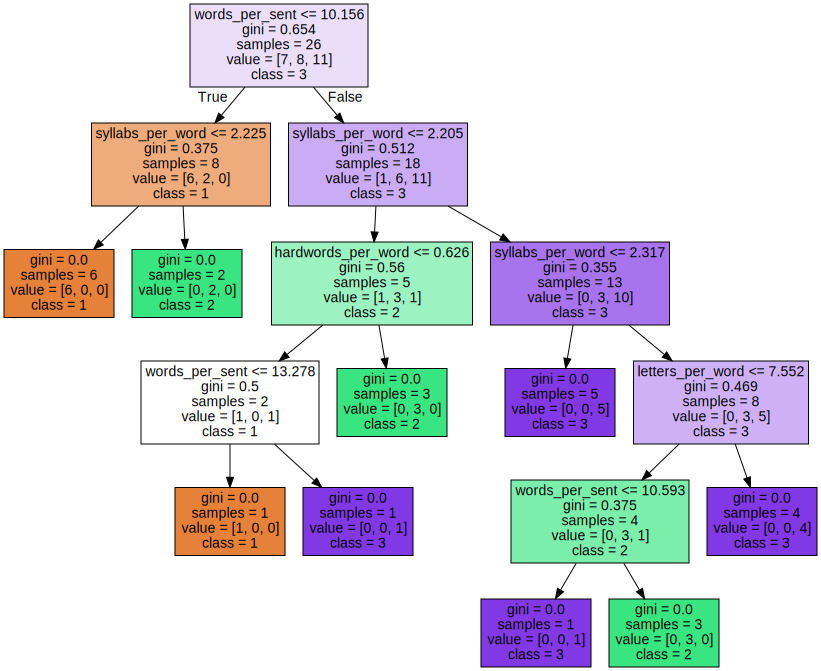

In [67]:
df2comp2 = df2comp[['name', "document", 'year', 'grade', 'subject']]
df2comp2.insert(5, "words_per_sent", 0)
df2comp2.insert(6, "syllabs_per_word", 0)
df2comp2.insert(7, "letters_per_word", 0)
df2comp2.insert(8, "longwords_per_word", 0)
df2comp2.insert(9, "hardwords_per_word", 0)
df2comp2.insert(10, "uniquewords_per_word", 0)
for ind in df2metr.index:
  df2comp2['words_per_sent'][ind] = df2comp["sum_words_2"][ind]/df2comp["sum_sent"][ind]
  df2comp2['syllabs_per_word'][ind] = df2comp["syllables"][ind]/df2comp["sum_words_2"][ind]
  df2comp2['letters_per_word'][ind] = df2comp["charlist"][ind]/df2comp["sum_words_2"][ind]
  dfcomp2['longwords_per_word'][ind] = dfx3["many"][ind]/dfcomp["sum_words_2"][ind]
  df2comp2['hardwords_per_word'][ind] = df2comp['hard_words'][ind]/df2comp["sum_words_2"][ind]
  df2comp2['uniquewords_per_word'][ind] = df2comp["sum_words_2"][ind]/df2comp["unique_words"][ind]
df2metr.to_csv('tabx3.csv', sep=';', encoding='utf-16', index=False)
df2comp.to_csv('tabx4.csv', sep=';', encoding='utf-16', index=False)
df2metr2 = df2metr[['name', "document", 'year', 'grade', 'subject', 'M_flesch_kincaid', 'M_smog', 'M_gunning_fog', 'M_ari', 'M_coleman_liau', 'M_spache', 'M_linsear_write', 'M_dale_chall', 'M_Mistrík']]
df2metr2.to_csv('tabx5.csv', sep=';', encoding='utf-16', index=False)
df2comp2.to_csv('tabx6.csv', sep=';', encoding='utf-16', index=False)
df2train = ['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']
X = df2comp2[dftrain]
y = df2comp2['grade']
y=y.astype('int')
i = 0
while i < 1:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = DecisionTreeClassifier(max_depth=6)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  i = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = dftrain,class_names=['1','2','3'], filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('decision tree')
graph

In [68]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000), SGDClassifier(), LinearSVC(), KNeighborsClassifier(n_neighbors=2), GradientBoostingClassifier(), BernoulliNB()]
for classifier in classifiers:
  clf = classifier
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  p, r, f, s = precision_recall_fscore_support(y_test, y_pred)
  print(classifier)
  print('acc: ',metrics.accuracy_score(y_test, y_pred))
  print('prec: ',((p[0]+p[1])/2),'(',p[0],' / ',p[1],')')
  print('rec: ',((r[0]+r[1])/2),'(',r[0],' / ',r[1],')')
  print('f1-sc:',((f[0]+f[1])/2))
  print('-----------------------------')

DecisionTreeClassifier()
acc:  0.8571428571428571
prec:  1.0 ( 1.0  /  1.0 )
rec:  0.8333333333333333 ( 1.0  /  0.6666666666666666 )
f1-sc: 0.9
-----------------------------
RandomForestClassifier()
acc:  0.7142857142857143
prec:  0.8333333333333333 ( 1.0  /  0.6666666666666666 )
rec:  0.8333333333333333 ( 1.0  /  0.6666666666666666 )
f1-sc: 0.8333333333333333
-----------------------------
LogisticRegression(class_weight='balanced', max_iter=10000)
acc:  0.5714285714285714
prec:  0.625 ( 0.75  /  0.5 )
rec:  0.6666666666666666 ( 1.0  /  0.3333333333333333 )
f1-sc: 0.6285714285714286
-----------------------------
SGDClassifier()
acc:  0.5714285714285714
prec:  0.375 ( 0.75  /  0.0 )
rec:  0.5 ( 1.0  /  0.0 )
f1-sc: 0.42857142857142855
-----------------------------
LinearSVC()
acc:  0.5714285714285714
prec:  0.375 ( 0.75  /  0.0 )
rec:  0.5 ( 1.0  /  0.0 )
f1-sc: 0.42857142857142855
-----------------------------
KNeighborsClassifier(n_neighbors=2)
acc:  0.7142857142857143
prec:  0.708333

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

GradientBoostingClassifier()
acc:  0.5714285714285714
prec:  0.625 ( 0.75  /  0.5 )
rec:  0.6666666666666666 ( 1.0  /  0.3333333333333333 )
f1-sc: 0.6285714285714286
-----------------------------
BernoulliNB()
acc:  0.14285714285714285
prec:  0.0 ( 0.0  /  0.0 )
rec:  0.0 ( 0.0  /  0.0 )
f1-sc: 0.0
-----------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
df2comp3 =df2comp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].mean()
df2comp4 =df2comp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].min()
df2comp5 =df2comp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].max()
for column in df2comp3:
  df2comp3 = df2comp3.rename(columns={column: column+"_aver"})
i = 0
for column in df2comp4:
  df2comp3.insert(i, column+"_min", df2comp4[column])
  i = i + 2
i = 2
for column in df2comp5:
  df2comp3.insert(i, column+"_max", df2comp5[column])
  i = i + 3
df2comp3 = df2comp3.reset_index()
df2comp6 =df2comp2.groupby(['grade'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].mean()
df2comp7 =df2comp2.groupby(['grade'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].min()
df2comp8 =df2comp2.groupby(['grade'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].max()
for column in df2comp6:
  df2comp6 = df2comp6.rename(columns={column: column+"_aver"})
i = 0
for column in df2comp7:
  df2comp6.insert(i, column+"_min", df2comp7[column])
  i = i + 2
i = 2
for column in df2comp8:
  df2comp6.insert(i, column+"_max", df2comp8[column])
  i = i + 3
df2comp6 = df2comp6.reset_index()
df2comp3.to_csv('tabx7.csv', sep=';', encoding='utf-16', index=False)
df2comp6.to_csv('tabx8.csv', sep=';', encoding='utf-16', index=False)

<ipython-input-70-8e375170d93b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2comp3 =df2comp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].mean()
<ipython-input-70-8e375170d93b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2comp4 =df2comp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word'].min()
<ipython-input-70-8e375170d93b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2comp5 =df2comp2.groupby(['grade','subject'])['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'un

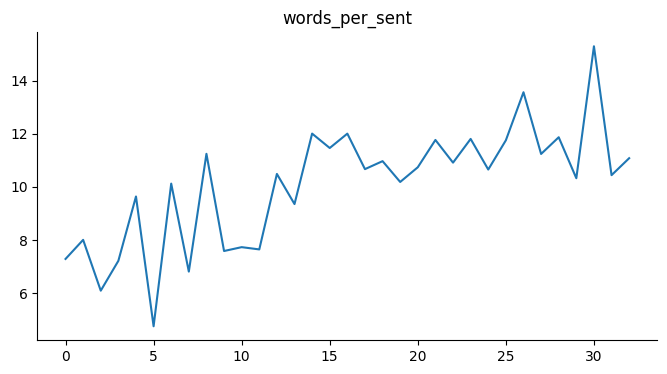

In [ ]:
# @title words_per_sent

from matplotlib import pyplot as plt
df2comp2['words_per_sent'].plot(kind='line', figsize=(8, 4), title='words_per_sent')
plt.gca().spines[['top', 'right']].set_visible(False)